In [ ]:
! pip install samplerate
! pip install resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 76.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.4 MB/s eta 0:00:00


In [ ]:
import os
import random
import sys


## Package
import glob
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow
py.init_notebook_mode(connected=True)


## Keras
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3
# % pylab inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Reading the Data

In [ ]:
# Data Directory
# Please edit according to your directory change.
dir_list = os.listdir('/content/drive/MyDrive/collab file/Audio_Speech_Actors_01-24')
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [ ]:
# Create DataFrame for Data intel
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])
count = 0
for i in dir_list:
    file_list = os.listdir('/content/drive/MyDrive/collab file/Audio_Speech_Actors_01-24/' + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = '/content/drive/MyDrive/collab file/Audio_Speech_Actors_01-24/' + i + '//' + f
        src = int(nm[1])
        actor = int(nm[-3])
        emotion = int(nm[2])

        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"

        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1

        if nm[4] == '01':
            statement = 0
        else:
            statement = 1

        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1

        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [ ]:
print (len(data_df))
data_df.head(25)

730


,path,source,actor,gender,intensity,statement,repetition,emotion
0,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,0,0,1,2
1,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,0,0,0,1
2,/content/drive/MyDrive/collab file/Audio_Speec...,1,2,female,0,1,1,1
3,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,0,0,1,1
4,/content/drive/MyDrive/collab file/Audio_Speec...,1,2,female,0,1,1,2
5,/content/drive/MyDrive/collab file/Audio_Speec...,1,2,female,0,1,0,2
6,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,1,0,0,2
7,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,1,0,1,2
8,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,0,0,0,2
9,/content/drive/MyDrive/collab file/Audio_Speec...,1,2,female,0,1,0,1


## Plotting the audio file's waveform and its spectrogram

In [ ]:
filename = data_df.path[720]
print (filename)

samples, sample_rate = librosa.load(filename)
sample_rate, samples

/content/drive/MyDrive/collab file/Audio_Speech_Actors_01-24/Actor_24//03-01-05-01-02-02-24.wav


(22050,
 array([ 0.000000e+00,  0.000000e+00,  0.000000e+00, ..., -7.237325e-06,
         5.934374e-07,  0.000000e+00], dtype=float32))

In [ ]:
len(samples), sample_rate

(69159, 22050)

In [ ]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [ ]:
sample_rate/ len(samples)

0.2378563800524255

Text(0.5, 0, 'Seconds')

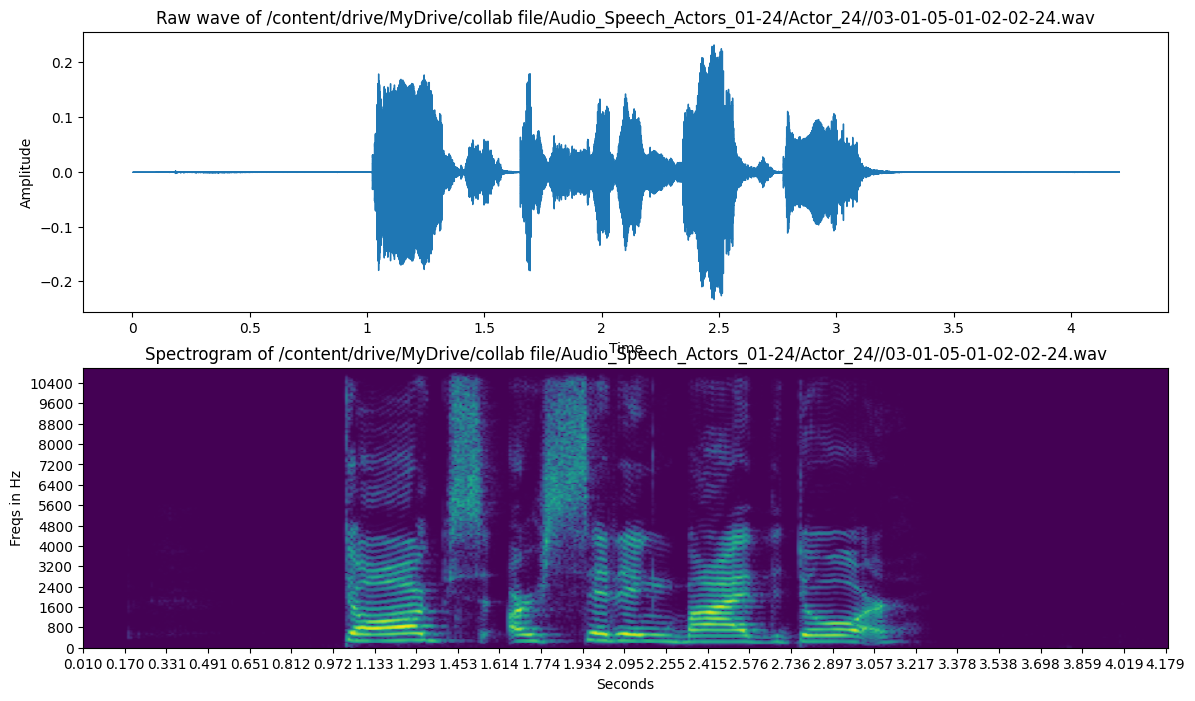

In [ ]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveshow(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower',
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [ ]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [ ]:
# Trim the silence voice
aa , bb = librosa.effects.trim(samples, top_db=30)
aa, bb

(array([2.4652636e-05, 3.5681660e-06, 1.3507775e-05, ..., 2.6832612e-03,
        2.4424628e-03, 2.7345079e-03], dtype=float32),
 array([22016, 69632]))

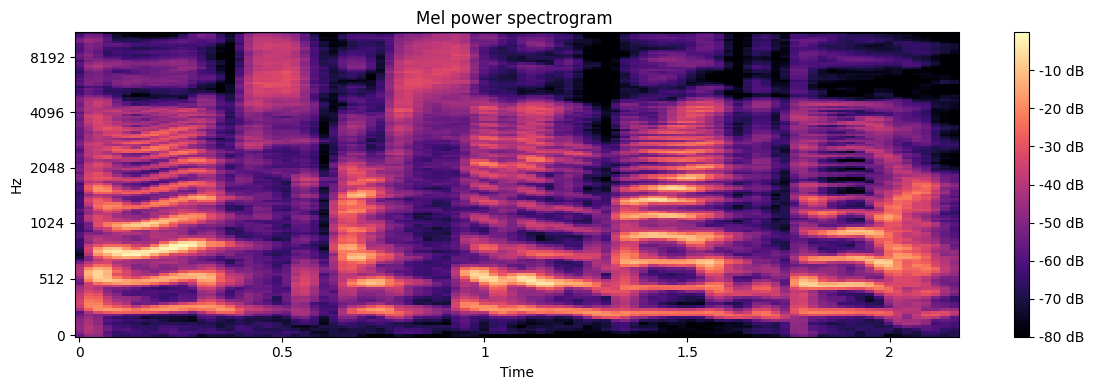

In [ ]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(y=aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

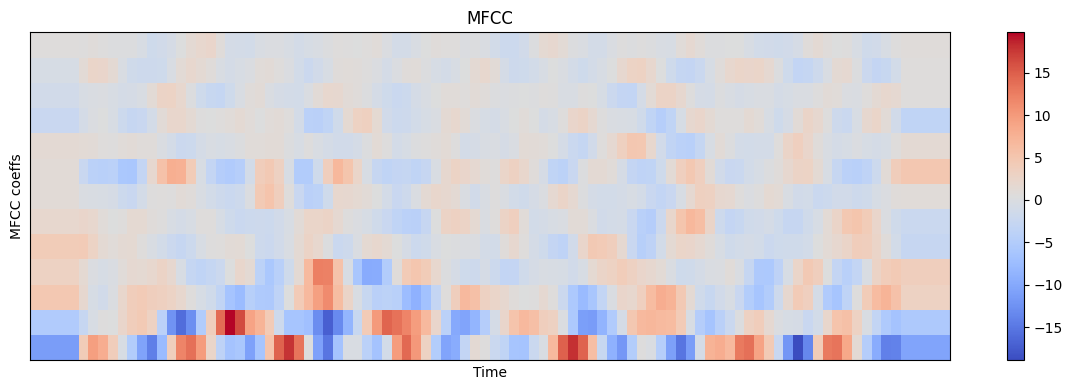

In [ ]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [ ]:
# Original Sound
ipd.Audio(samples, rate=sample_rate)

In [ ]:
# Silence trimmed Sound by librosa.effects.trim()
ipd.Audio(aa, rate=sample_rate)

In [ ]:
# Silence trimmed Sound by manual trimming
samples_cut = samples[10000:-12500]
ipd.Audio(samples_cut, rate=sample_rate)

## Defining the label

In [ ]:
# 2 class: Positive & Negative

# Positive: Calm, Happy
# Negative: Angry, Fearful, Sad

label2_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2: # Calm
        lb = "_positive"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_negative"
    else:
        lb = "_none"

    # Add gender to the label
    label2_list.append(data_df.gender[i] + lb)

len(label2_list)

730

In [ ]:
#3 class: Positive, Neutral & Negative

# Positive:  Happy
# Negative: Angry, Fearful, Sad
# Neutral: Calm, Neutral

label3_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1: # Neutral
        lb = "_neutral"
    elif data_df.emotion[i] == 2: # Calm
        lb = "_neutral"
    elif data_df.emotion[i] == 3: # Happy
        lb = "_positive"
    elif data_df.emotion[i] == 4: # Sad
        lb = "_negative"
    elif data_df.emotion[i] == 5: # Angry
        lb = "_negative"
    elif data_df.emotion[i] == 6: # Fearful
        lb = "_negative"
    else:
        lb = "_none"

    # Add gender to the label
    label3_list.append(data_df.gender[i] + lb)

len(label3_list)

730

In [ ]:
# 5 class: angry, calm, sad, happy & fearful
label5_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"
    else:
        lb = "_none"

    # Add gender to the label
    label5_list.append(data_df.gender[i] + lb)

len(label5_list)

730

In [ ]:
# All class

label8_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"
    elif data_df.emotion[i] == 7:
        lb = "_disgust"
    elif data_df.emotion[i] == 8:
        lb = "_surprised"
    else:
        lb = "_none"

    # Add gender to the label
    label8_list.append(data_df.gender[i]  + lb)

len(label8_list)

730

In [ ]:
# Select the label set you want by commenting the unwanteds.

data_df['label'] = label5_list
# data_df['label'] = label3_list
# data_df['label'] = label5_list
#data_df['label'] = label8_list
data_df.head()

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,0,0,1,2,male_calm
1,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,0,0,0,1,male_none
2,/content/drive/MyDrive/collab file/Audio_Speec...,1,2,female,0,1,1,1,female_none
3,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,0,0,1,1,male_none
4,/content/drive/MyDrive/collab file/Audio_Speec...,1,2,female,0,1,1,2,female_calm


In [ ]:
print (data_df.label.value_counts().keys())

Index(['male_none', 'female_none', 'male_calm', 'female_calm', 'female_happy',
       'male_sad', 'male_happy', 'female_fearful', 'female_angry',
       'male_angry', 'male_fearful', 'female_sad'],
      dtype='object')


In [ ]:
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count.
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

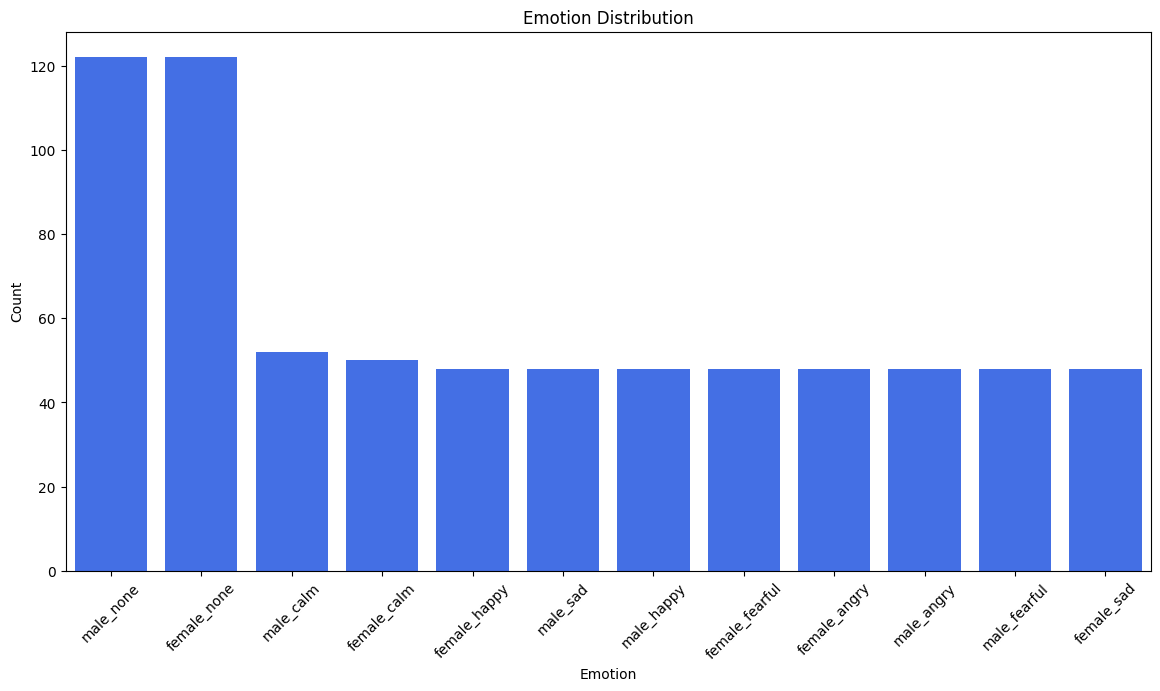

In [ ]:
a = data_df.label.value_counts()
plot_emotion_dist(a, "#2962FF", "Emotion Distribution")

## Data Splitting

In [ ]:
# Male Data Set

data2_df = data_df.copy()
data2_df = data2_df[data2_df.label != "male_none"]
data2_df = data2_df[data2_df.label != "female_none"].reset_index(drop=True)
data2_df = data2_df[data2_df.label != "female_neutral"]
data2_df = data2_df[data2_df.label != "female_happy"]
data2_df = data2_df[data2_df.label != "female_angry"]
data2_df = data2_df[data2_df.label != "female_sad"]
data2_df = data2_df[data2_df.label != "female_fearful"]
data2_df = data2_df[data2_df.label != "female_calm"]
data2_df = data2_df[data2_df.label != "female_positive"]
data2_df = data2_df[data2_df.label != "female_negative"].reset_index(drop=True)

tmp1 = data2_df[data2_df.actor == 21]
tmp2 = data2_df[data2_df.actor == 22]
tmp3 = data2_df[data2_df.actor == 23]
tmp4 = data2_df[data2_df.actor == 24]
data3_df = pd.concat([tmp1, tmp3],ignore_index=True).reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 21]
data2_df = data2_df[data2_df.actor != 22]
data2_df = data2_df[data2_df.actor != 23].reset_index(drop=True)
data2_df = data2_df[data2_df.actor != 24].reset_index(drop=True)
print (len(data2_df))
data2_df.head(50)

244


,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,0,0,1,2,male_calm
1,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,1,0,0,2,male_calm
2,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,1,0,1,2,male_calm
3,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,0,0,0,2,male_calm
4,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,1,0,1,4,male_sad
5,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,0,0,1,3,male_happy
6,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,0,0,1,5,male_angry
7,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,1,0,1,6,male_fearful
8,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,1,0,0,5,male_angry
9,/content/drive/MyDrive/collab file/Audio_Speec...,1,1,male,1,0,0,4,male_sad


In [ ]:
print (len(data3_df))
data3_df.head(80)

0


,path,source,actor,gender,intensity,statement,repetition,emotion,label


In [ ]:


data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

100%|██████████| 244/244 [01:06<00:00,  3.67it/s]


## Analysing Features of audio files using librosa

In [ ]:
data.head()

,feature
0,"[-53.419655, -51.2393, -50.15429, -50.26511, -..."
1,"[-67.37338, -67.37338, -67.37338, -67.37338, -..."
2,"[-63.390244, -61.96948, -58.337032, -55.854515..."
3,"[-64.96962, -64.45145, -65.17623, -65.66326, -..."
4,"[-53.291245, -56.672367, -62.573143, -61.61720..."


In [ ]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data2_df.label

In [ ]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-53.419655,-51.239300,-50.154289,-50.265110,-49.667740,-50.570244,-53.410641,-55.976517,-56.247890,-56.110970,...,-65.180748,-63.288029,-63.014996,-60.891018,-60.982265,-61.644829,-64.302399,-62.331932,-60.442764,-61.371811
1,-67.373383,-67.373383,-67.373383,-67.373383,-67.373383,-67.373383,-67.376663,-65.082146,-61.742191,-61.252151,...,-60.303936,-60.420284,-59.518944,-60.281914,-62.361443,-63.796448,-62.944065,-63.837620,-62.913914,-63.453819
2,-63.390244,-61.969479,-58.337032,-55.854515,-55.374344,-57.208096,-55.983196,-55.858257,-51.315613,-51.098770,...,-59.055820,-57.920132,-57.480644,-56.946201,-56.334621,-57.930275,-59.269478,-62.567612,-60.545456,-57.922356
3,-64.969620,-64.451447,-65.176231,-65.663261,-65.663261,-65.663261,-65.663261,-65.663261,-65.663261,-65.663261,...,-55.068245,-54.616562,-56.455643,-58.737366,-57.076008,-55.777836,-56.331261,-57.866703,-56.718224,-55.687096
4,-53.291245,-56.672367,-62.573143,-61.617203,-59.686539,-56.597088,-55.043144,-56.652626,-56.954510,-56.289036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
newdf = pd.concat([df3,labels], axis=1)

In [ ]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})
len(rnewdf)

244

In [ ]:
rnewdf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-53.419655,-51.239300,-50.154289,-50.265110,-49.667740,-50.570244,-53.410641,-55.976517,-56.247890,-56.110970,...,-63.288029,-63.014996,-60.891018,-60.982265,-61.644829,-64.302399,-62.331932,-60.442764,-61.371811,male_calm
1,-67.373383,-67.373383,-67.373383,-67.373383,-67.373383,-67.373383,-67.376663,-65.082146,-61.742191,-61.252151,...,-60.420284,-59.518944,-60.281914,-62.361443,-63.796448,-62.944065,-63.837620,-62.913914,-63.453819,male_calm
2,-63.390244,-61.969479,-58.337032,-55.854515,-55.374344,-57.208096,-55.983196,-55.858257,-51.315613,-51.098770,...,-57.920132,-57.480644,-56.946201,-56.334621,-57.930275,-59.269478,-62.567612,-60.545456,-57.922356,male_calm
3,-64.969620,-64.451447,-65.176231,-65.663261,-65.663261,-65.663261,-65.663261,-65.663261,-65.663261,-65.663261,...,-54.616562,-56.455643,-58.737366,-57.076008,-55.777836,-56.331261,-57.866703,-56.718224,-55.687096,male_calm
4,-53.291245,-56.672367,-62.573143,-61.617203,-59.686539,-56.597088,-55.043144,-56.652626,-56.954510,-56.289036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_sad
5,-56.081734,-55.737297,-54.387108,-54.010933,-56.672523,-58.653023,-63.387798,-64.596863,-60.969612,-58.170475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_happy
6,-54.634781,-53.964581,-55.695618,-55.929398,-54.200985,-53.187614,-53.727654,-55.706184,-56.292294,-55.521843,...,-57.919353,-57.906376,-57.869350,-54.799259,-52.827274,-53.734192,-55.741150,-55.929157,-57.919353,male_angry
7,-45.634418,-47.341900,-48.728333,-49.372379,-50.501465,-51.668434,-51.372070,-51.137123,-51.782162,-51.782162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_fearful
8,-40.016762,-40.016762,-40.016762,-40.016762,-40.016762,-40.016762,-40.016762,-40.016762,-40.016762,-40.016762,...,-40.016762,-39.779331,-39.047215,-38.938053,-39.262291,-39.427334,-39.867046,-39.899529,-39.061737,male_angry
9,-55.939148,-54.504940,-53.672508,-56.541702,-54.399178,-51.947475,-54.292271,-54.611813,-55.476864,-56.366474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_sad


In [ ]:
rnewdf.isnull().sum().sum()

699

In [ ]:
rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-53.419655,-51.239300,-50.154289,-50.265110,-49.667740,-50.570244,-53.410641,-55.976517,-56.247890,-56.110970,...,-63.288029,-63.014996,-60.891018,-60.982265,-61.644829,-64.302399,-62.331932,-60.442764,-61.371811,male_calm
1,-67.373383,-67.373383,-67.373383,-67.373383,-67.373383,-67.373383,-67.376663,-65.082146,-61.742191,-61.252151,...,-60.420284,-59.518944,-60.281914,-62.361443,-63.796448,-62.944065,-63.837620,-62.913914,-63.453819,male_calm
2,-63.390244,-61.969479,-58.337032,-55.854515,-55.374344,-57.208096,-55.983196,-55.858257,-51.315613,-51.098770,...,-57.920132,-57.480644,-56.946201,-56.334621,-57.930275,-59.269478,-62.567612,-60.545456,-57.922356,male_calm
3,-64.969620,-64.451447,-65.176231,-65.663261,-65.663261,-65.663261,-65.663261,-65.663261,-65.663261,-65.663261,...,-54.616562,-56.455643,-58.737366,-57.076008,-55.777836,-56.331261,-57.866703,-56.718224,-55.687096,male_calm
4,-53.291245,-56.672367,-62.573143,-61.617203,-59.686539,-56.597088,-55.043144,-56.652626,-56.954510,-56.289036,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_sad


## Data Making/Processing

In [ ]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)

def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data

def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())
    data = librosa.effects.pitch_shift(data.astype('float64'),
                                      sample_rate, n_steps=pitch_change,
                                      bins_per_octave=bins_per_octave)
    return data

def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)

def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

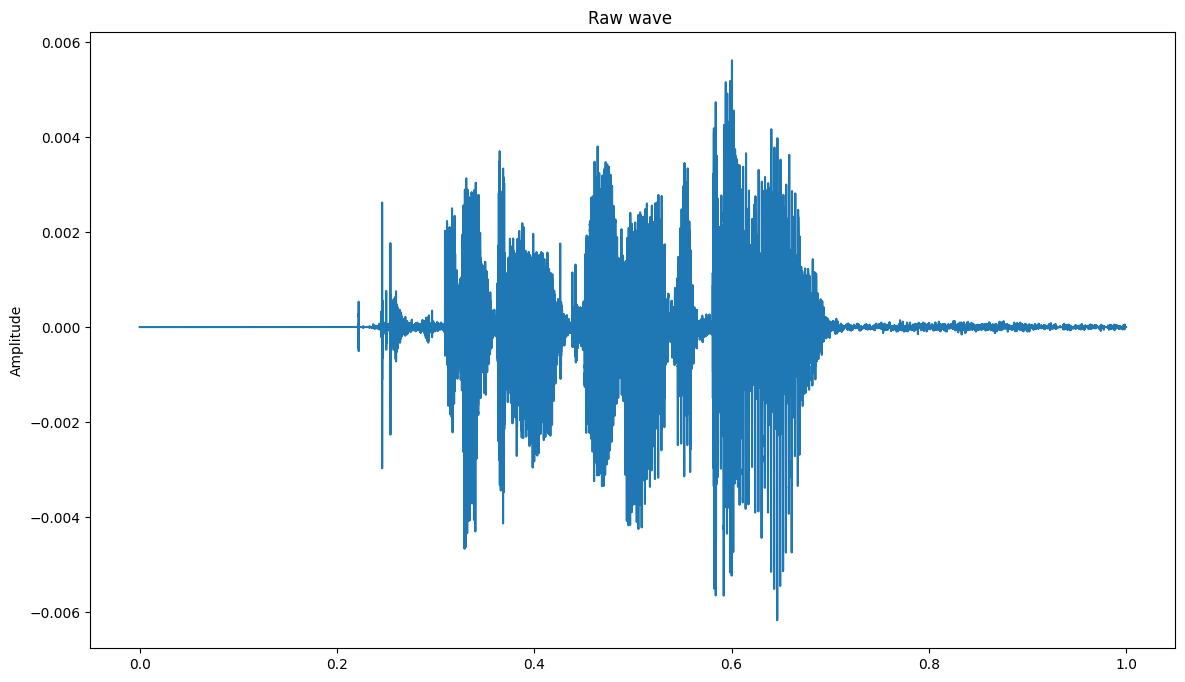

In [ ]:
X, sample_rate = librosa.load(data2_df.path[150], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.3)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning:

Casting complex values to real discards the imaginary part



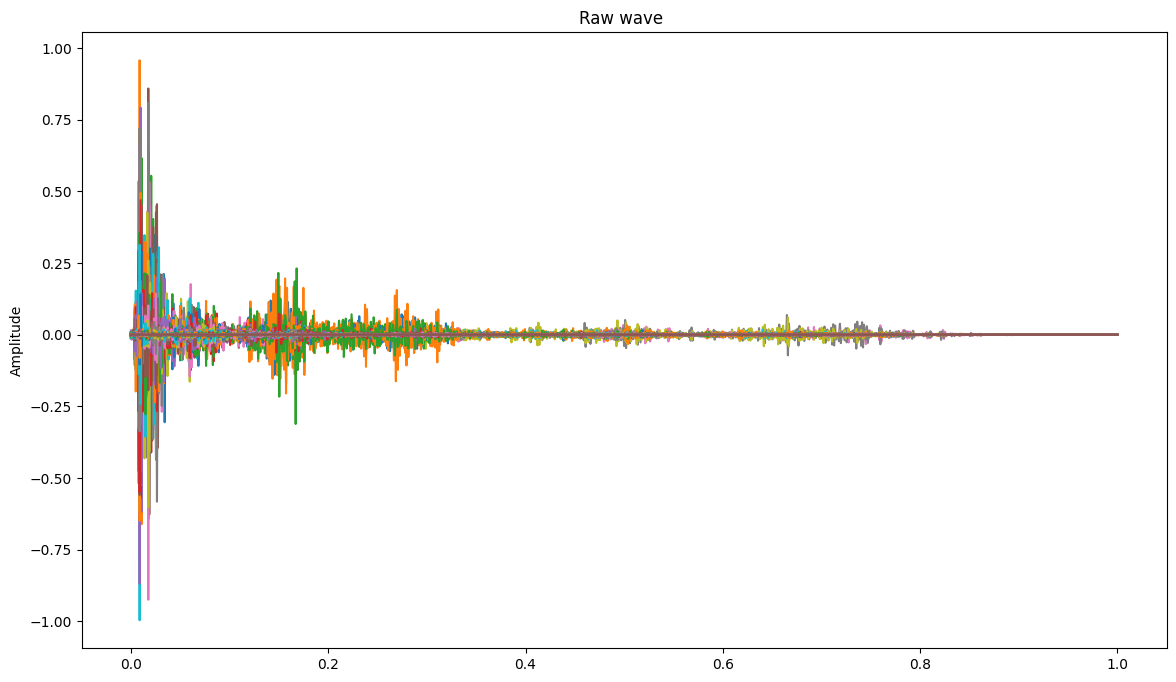

/usr/local/lib/python3.10/dist-packages/IPython/lib/display.py:159: ComplexWarning:

Casting complex values to real discards the imaginary part



In [ ]:
x = librosa.stft(X)
plot_time_series(x)
ipd.Audio(x, rate=sample_rate)




In [ ]:
# Data Making Method 1

syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data2_df.label[i]:
#     if data2_df.label[i] == "male_positive":
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data2_df.label[i]]

100%|██████████| 244/244 [00:20<00:00, 11.89it/s]


In [ ]:
len(syn_data1)

244

In [ ]:
syn_data2 = pd.DataFrame(columns=['feature', 'label'])


In [ ]:
len(syn_data1), len(syn_data2)

(244, 0)

In [ ]:
# Data Making Method 2

X = librosa.effects.pitch_shift(X, sr=sample_rate, n_steps=10)




In [ ]:
def foo(a, b):
  print(a, b)


In [ ]:
foo(1, 2)


1 2


In [ ]:
def bar(a, b=10):
  print(a, b)


In [ ]:
bar(1)
bar(1, b=20)


1 10
1 20


In [ ]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [ ]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
syndf1 = syndf1.fillna(0)
len(syndf1)

244

In [ ]:
syndf1.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-52.231231,-49.574935,-48.645329,-48.924251,-48.575097,-50.267260,-52.843380,-53.921471,-54.600056,-54.950428,...,-58.499470,-57.519843,-56.713156,-57.568466,-60.072298,-58.533274,-58.530482,-58.166972,-59.685042,male_calm
1,-62.421898,-61.326826,-60.241940,-61.038348,-60.789052,-59.280492,-59.168580,-58.337531,-56.854888,-56.671636,...,-56.237600,-56.958838,-55.221429,-56.136422,-57.607649,-56.582814,-60.181091,-61.354520,-63.017827,male_calm
2,-64.318144,-61.964795,-58.094100,-55.675304,-55.055463,-56.832897,-55.512813,-55.725609,-51.476330,-51.312993,...,-57.961996,-57.436121,-56.838376,-56.321679,-57.797097,-59.397366,-62.310936,-60.292109,-58.054628,male_calm
3,-63.617160,-61.653675,-61.821550,-63.015062,-61.989661,-61.560946,-61.135510,-58.968041,-58.398207,-60.242921,...,-52.854072,-55.017137,-56.274723,-55.687363,-54.082177,-55.161826,-56.719891,-55.943761,-55.033928,male_calm
4,-53.859728,-54.075006,-55.960459,-55.329627,-53.408500,-51.734580,-53.717754,-54.601153,-52.344724,-52.049437,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_sad


In [ ]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "label"})
syndf2 = syndf2.fillna(0)
len(syndf2)

0

In [ ]:
syndf2.head()

,label


In [ ]:
# Combining the Proccessed data with original
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()


,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-53.419655,-51.239300,-50.154289,-50.265110,-49.667740,-50.570244,-53.410641,-55.976517,-56.247890,-56.110970,...,-63.288029,-63.014996,-60.891018,-60.982265,-61.644829,-64.302399,-62.331932,-60.442764,-61.371811,male_calm
1,-67.373383,-67.373383,-67.373383,-67.373383,-67.373383,-67.373383,-67.376663,-65.082146,-61.742191,-61.252151,...,-60.420284,-59.518944,-60.281914,-62.361443,-63.796448,-62.944065,-63.837620,-62.913914,-63.453819,male_calm
2,-63.390244,-61.969479,-58.337032,-55.854515,-55.374344,-57.208096,-55.983196,-55.858257,-51.315613,-51.098770,...,-57.920132,-57.480644,-56.946201,-56.334621,-57.930275,-59.269478,-62.567612,-60.545456,-57.922356,male_calm
3,-64.969620,-64.451447,-65.176231,-65.663261,-65.663261,-65.663261,-65.663261,-65.663261,-65.663261,-65.663261,...,-54.616562,-56.455643,-58.737366,-57.076008,-55.777836,-56.331261,-57.866703,-56.718224,-55.687096,male_calm
4,-53.291245,-56.672367,-62.573143,-61.617203,-59.686539,-56.597088,-55.043144,-56.652626,-56.954510,-56.289036,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_sad


In [ ]:
#  Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit
X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
y_train.value_counts()

male_calm       83
male_happy      77
male_angry      77
male_fearful    77
male_sad        76
Name: label, dtype: int64

In [ ]:
y_test.value_counts()

male_calm       21
male_sad        20
male_angry      19
male_fearful    19
male_happy      19
Name: label, dtype: int64

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
y_train

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train

array([[-50.47069525, -43.8734725 , -43.08601626, ...,   0.        ,
          0.        ,   0.        ],
       [-68.67420197, -68.67420197, -68.67420197, ..., -68.67420197,
        -68.67420197, -68.67420197],
       [-57.50148384, -55.90409679, -54.69857076, ..., -55.45030721,
        -57.30147053, -58.41508607],
       ...,
       [-43.15266418, -43.15266418, -43.15266418, ..., -43.15266418,
        -43.15266418, -43.15266418],
       [-49.80303898, -48.49445391, -47.58350858, ...,   0.        ,
          0.        ,   0.        ],
       [-62.73642567, -59.74520285, -56.92950507, ..., -55.28390618,
        -55.08971287, -57.24434875]])

In [ ]:
X_train.shape

(390, 259)

## Creating the CNN Model

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [ ]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='valid',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(5))
model.add(Activation('softmax'))
#opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 252, 256)          2304      
                                                                 
 activation (Activation)     (None, 252, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 252, 256)          524544    
                                                                 
 batch_normalization (BatchN  (None, 252, 256)         1024      
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 252, 256)          0         
                                                                 
 dropout (Dropout)           (None, 252, 256)          0         
                                                        

In [ ]:
# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Model Training

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint('E:\\8th sem\\Final_Year_Project_Files\\New Folder\\Data_noiseNshift.h5', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Epoch 1/100
25/25 [==============================] - 12s 340ms/step - loss: 1.5567 - accuracy: 0.2949 - val_loss: 10.7978 - val_accuracy: 0.2143 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 8s 339ms/step - loss: 1.4595 - accuracy: 0.3462 - val_loss: 5.4658 - val_accuracy: 0.2755 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 7s 295ms/step - loss: 1.4324 - accuracy: 0.3949 - val_loss: 2.3954 - val_accuracy: 0.2347 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 9s 355ms/step - loss: 1.3847 - accuracy: 0.3923 - val_loss: 1.8213 - val_accuracy: 0.3061 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 10s 386ms/step - loss: 1.4178 - accuracy: 0.4000 - val_loss: 1.6665 - val_accuracy: 0.2449 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 7s 286ms/step - loss: 1.3805 - accuracy: 0.3795 - val_loss: 1.4702 - val_accuracy: 0.3469 - lr: 0.0010
Epoch 7/100
25/25 [==============================] - 8s 335ms

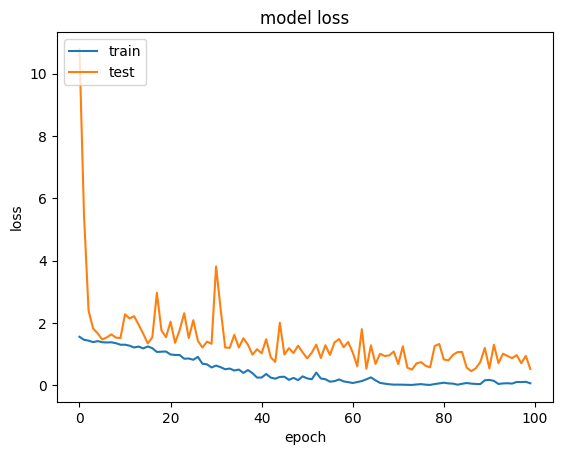

In [ ]:

# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Saving the model.json

import json
model_json = model.to_json()
with open("E:\\8th sem\\Final_Year_Project_Files\\New Folder\\model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
loaded_model = tf.keras.models.load_model("E:\\8th sem\\Final_Year_Project_Files\\New Folder\\Data_noiseNshift.h5",custom_objects={'GlorotUniform': glorot_uniform()})
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 85.71%


## Predicting emotions on the test data

In [ ]:
len(data2_df)

244

In [ ]:
data_test = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data2_df))):
    X, sample_rate = librosa.load(data2_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
#     X = X[10000:90000]
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data_test.loc[i] = [feature]

test_valid = pd.DataFrame(data_test['feature'].values.tolist())
test_valid = np.array(test_valid)
test_valid_lb = np.array(data2_df.label)
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(test_valid_lb))
test_valid = np.expand_dims(test_valid, axis=2)

100%|██████████| 244/244 [00:15<00:00, 15.80it/s]


In [ ]:
preds = loaded_model.predict(test_valid,
                         batch_size=16,
                         verbose=1)

16/16 [==============================] - 1s 62ms/step


In [ ]:
preds

array([[1.2552050e-06, 9.9941778e-01, 2.9109933e-07, 1.4749447e-04,
        4.3318639e-04],
       [9.7636866e-06, 9.9961466e-01, 1.2924282e-08, 4.2176209e-05,
        3.3327637e-04],
       [6.5534972e-05, 9.8580074e-01, 9.0599387e-06, 5.3078546e-03,
        8.8166762e-03],
       ...,
       [4.5193534e-04, 5.2037853e-04, 4.7448833e-04, 9.9750739e-01,
        1.0458418e-03],
       [1.0946154e-04, 3.0498889e-08, 9.9981946e-01, 3.8066668e-05,
        3.3067470e-05],
       [2.8611745e-05, 9.9091059e-01, 7.9721497e-07, 1.7791556e-04,
        8.8820960e-03]], dtype=float32)

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

array([1, 1, 1, 1, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0,
       0, 3, 3, 1, 0, 0, 4, 1, 0, 0, 1, 4, 0, 3, 4, 3, 0, 4, 1, 4, 1, 0,
       1, 0, 3, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 1, 0, 0, 4, 1,
       0, 2, 3, 3, 1, 0, 0, 4, 2, 1, 1, 2, 0, 4, 4, 2, 3, 3, 0, 3, 0, 4,
       4, 0, 1, 2, 3, 0, 1, 2, 2, 3, 1, 1, 4, 1, 1, 2, 1, 0, 1, 0, 4, 0,
       0, 3, 1, 0, 2, 0, 3, 3, 4, 0, 2, 4, 4, 0, 4, 2, 1, 1, 4, 3, 1, 0,
       0, 0, 1, 2, 0, 2, 2, 4, 4, 3, 3, 3, 2, 1, 4, 3, 3, 1, 4, 4, 0, 0,
       2, 3, 3, 0, 1, 2, 2, 0, 4, 1, 2, 0, 3, 1, 3, 2, 4, 2, 4, 2, 4, 0,
       1, 0, 1, 3, 3, 1, 4, 1, 3, 1, 1, 0, 1, 2, 4, 1, 3, 0, 0, 2, 3, 4,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 2, 4, 1, 0, 4, 4, 0, 0, 4, 0,
       1, 0, 4, 1, 0, 2, 0, 4, 4, 3, 3, 2, 1, 4, 1, 3, 0, 4, 2, 0, 1, 3,
       2, 1])

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
print(abc)

[1 1 1 1 0 0 3 0 0 0 4 0 0 0 0 0 3 0 4 0 0 0 0 3 3 1 0 0 4 1 0 0 1 4 0 3 4
 3 0 4 1 4 1 0 1 0 3 1 3 1 0 0 0 0 0 0 0 0 2 0 4 1 0 0 4 1 0 2 3 3 1 0 0 4
 2 1 1 2 0 4 4 2 3 3 0 3 0 4 4 0 1 2 3 0 1 2 2 3 1 1 4 1 1 2 1 0 1 0 4 0 0
 3 1 0 2 0 3 3 4 0 2 4 4 0 4 2 1 1 4 3 1 0 0 0 1 2 0 2 2 4 4 3 3 3 2 1 4 3
 3 1 4 4 0 0 2 3 3 0 1 2 2 0 4 1 2 0 3 1 3 2 4 2 4 2 4 0 1 0 1 3 3 1 4 1 3
 1 1 0 1 2 4 1 3 0 0 2 3 4 3 0 1 2 2 1 2 1 0 0 0 0 2 4 1 0 4 4 0 0 4 0 1 0
 4 1 0 2 0 4 4 3 3 2 1 4 1 3 0 4 2 0 1 3 2 1]


In [ ]:
predictions = (lb.inverse_transform((abc)))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,male_calm
1,male_calm
2,male_calm
3,male_calm
4,male_angry
5,male_angry
6,male_happy
7,male_angry
8,male_angry
9,male_angry


In [ ]:
actual=test_valid_lb.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,male_calm
1,male_calm
2,male_calm
3,male_calm
4,male_sad
5,male_happy
6,male_angry
7,male_fearful
8,male_angry
9,male_sad


In [ ]:
finaldf = actualdf.join(preddf)
#abc1234 = finaldf.astype(float).flatten()
#finalvalues = (lb.inverse_transform((abc1234)))

## Actual vs Predicted Values

In [ ]:
finaldf[40:60]

,actualvalues,predictedvalues
40,male_calm,male_calm
41,male_sad,male_sad
42,male_calm,male_calm
43,male_fearful,male_angry
44,male_calm,male_calm
45,male_sad,male_angry
46,male_happy,male_happy
47,male_calm,male_calm
48,male_happy,male_happy
49,male_calm,male_calm


In [ ]:
finaldf.groupby('actualvalues').count()


,predictedvalues
actualvalues,
male_angry,48
male_calm,52
male_fearful,48
male_happy,48
male_sad,48


In [ ]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
male_angry,78
male_calm,53
male_fearful,33
male_happy,38
male_sad,42


In [ ]:
finaldf.to_csv('E:\\8th sem\\Final_Year_Project_Files\\New Folder\\Predictions.csv', index=False)

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score
y_true = finaldf.actualvalues
y_pred = finaldf.predictedvalues
accuracy_score(y_true, y_pred)*100

81.9672131147541

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro') *100

82.62778393010952

In [ ]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_true, y_pred)
c

array([[45,  2,  0,  1,  0],
       [ 5, 46,  0,  0,  1],
       [12,  1, 33,  1,  1],
       [11,  1,  0, 36,  0],
       [ 5,  3,  0,  0, 40]])

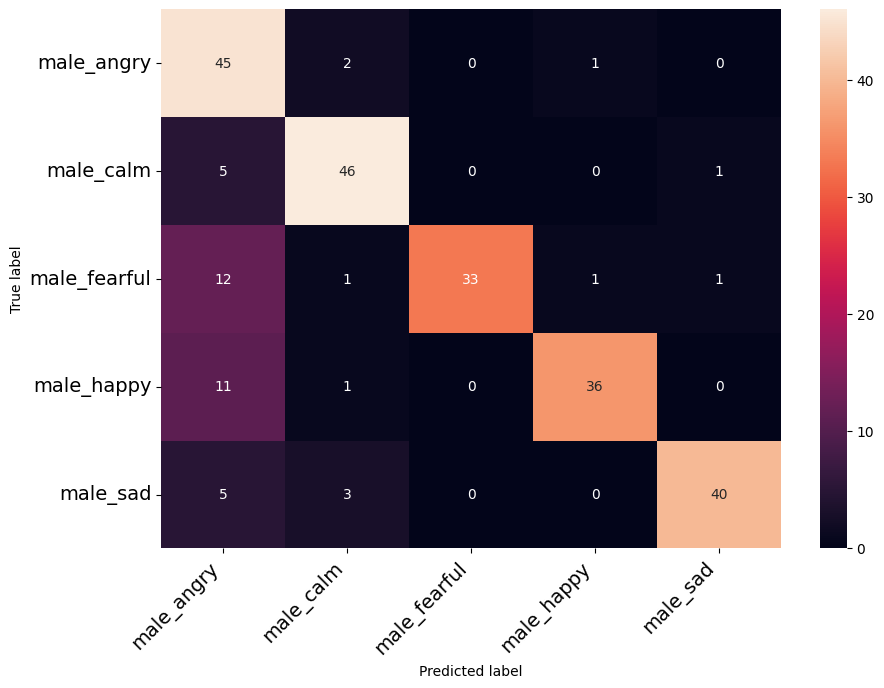

In [ ]:
# Visualize Confusion Matrix

class_names = ['male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad']
#class_names1 = ['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad']
#class_names = ['male_negative', 'male_neutral', 'male_positive']
#class_names = ['male_negative', 'male_positive']
#class_names = ['female_angry', 'female_calm', 'female_fearful', 'female_happy', 'female_sad', 'male_angry', 'male_calm', 'male_fearful', 'male_happy', 'male_sad']


print_confusion_matrix(c, class_names)